In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [26]:
image_original = cv2.imread('baboon.png')


In [27]:
def plot_image(image_1, image_2, title_1="Original", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1, cmap="gray" if len(image_1.shape)==2 else None)
    plt.title(title_1)
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(image_2, cmap="gray" if len(image_2.shape)==2 else None)
    plt.title(title_2)
    plt.axis("off")
    plt.show()

In [32]:
hist = cv2.calcHist([image_original],[0],None,[256],[0,255])
hist

array([[6.900e+01],
       [2.600e+01],
       [3.800e+01],
       [5.400e+01],
       [5.500e+01],
       [8.400e+01],
       [1.060e+02],
       [1.170e+02],
       [1.170e+02],
       [1.510e+02],
       [1.960e+02],
       [2.250e+02],
       [2.250e+02],
       [2.580e+02],
       [2.910e+02],
       [3.340e+02],
       [3.490e+02],
       [3.940e+02],
       [4.190e+02],
       [4.660e+02],
       [4.730e+02],
       [5.120e+02],
       [5.450e+02],
       [6.330e+02],
       [5.930e+02],
       [6.740e+02],
       [7.430e+02],
       [7.960e+02],
       [8.120e+02],
       [8.620e+02],
       [8.630e+02],
       [9.980e+02],
       [1.024e+03],
       [1.089e+03],
       [1.103e+03],
       [1.147e+03],
       [1.201e+03],
       [1.236e+03],
       [1.341e+03],
       [1.395e+03],
       [1.360e+03],
       [1.399e+03],
       [1.451e+03],
       [1.607e+03],
       [1.600e+03],
       [1.688e+03],
       [1.736e+03],
       [1.776e+03],
       [1.874e+03],
       [1.831e+03],


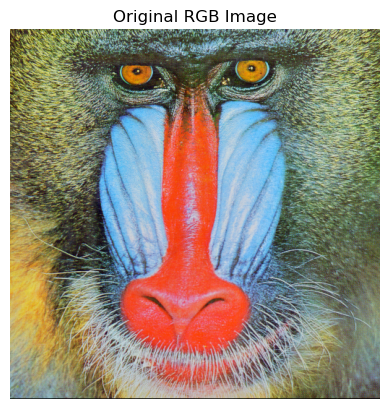

In [29]:
image_rgb = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title("Original RGB Image")
plt.axis("off")
plt.show()

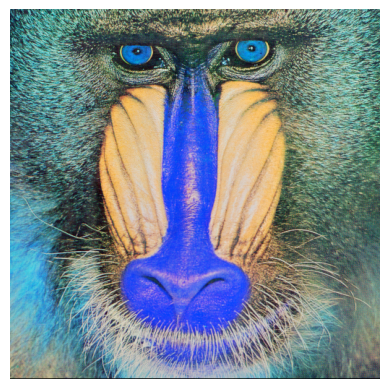

In [30]:
plt.imshow(image_original)
plt.axis('off')
plt.show()

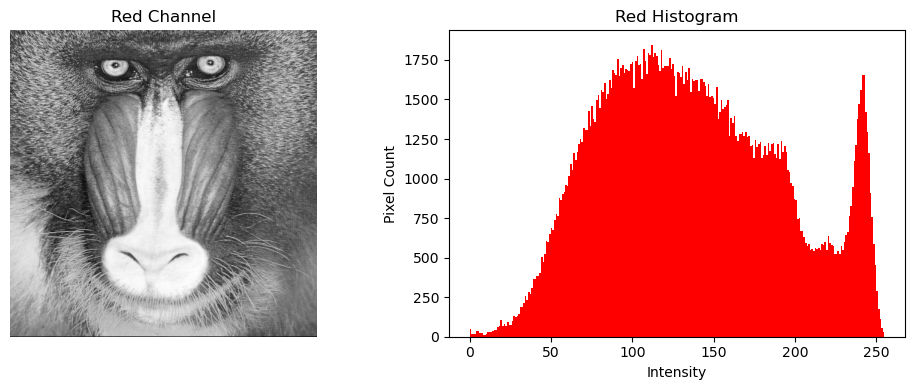

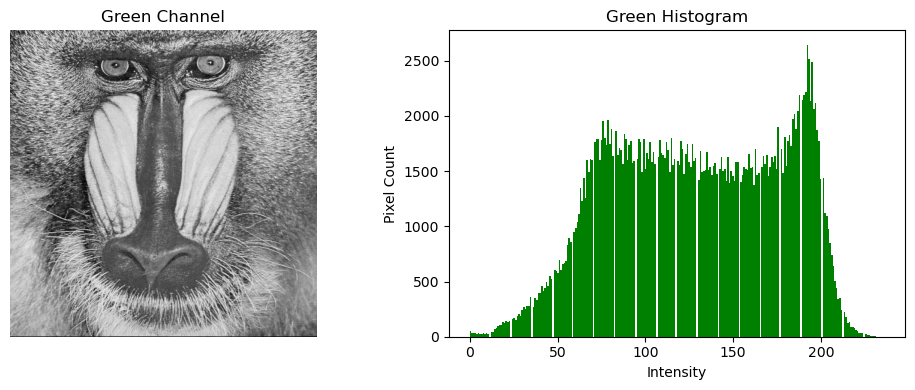

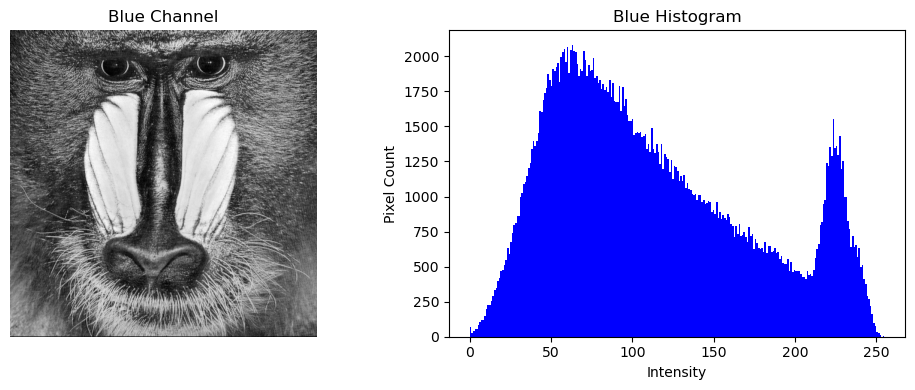

In [33]:
channels = ['Red', 'Green', 'Blue']
for i, color in enumerate(channels):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(image_rgb[:,:,i], cmap='gray')
    plt.title(f'{color} Channel')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.hist(image_rgb[:,:,i].ravel(), bins=256, color=color.lower())
    plt.title(f'{color} Histogram')
    plt.xlabel('Intensity')
    plt.ylabel('Pixel Count')
    plt.tight_layout()
    plt.show()

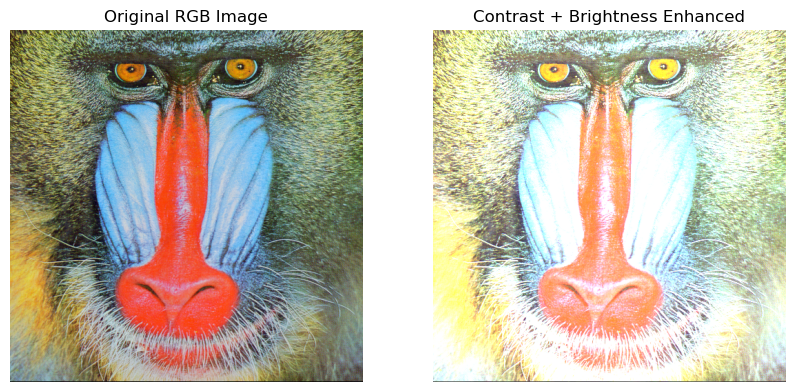

In [34]:
alpha = 1.5  
beta = 50    


image_transformed = cv2.convertScaleAbs(image_rgb, alpha=alpha, beta=beta)


plot_image(image_rgb, image_transformed, "Original RGB Image", "Contrast + Brightness Enhanced")

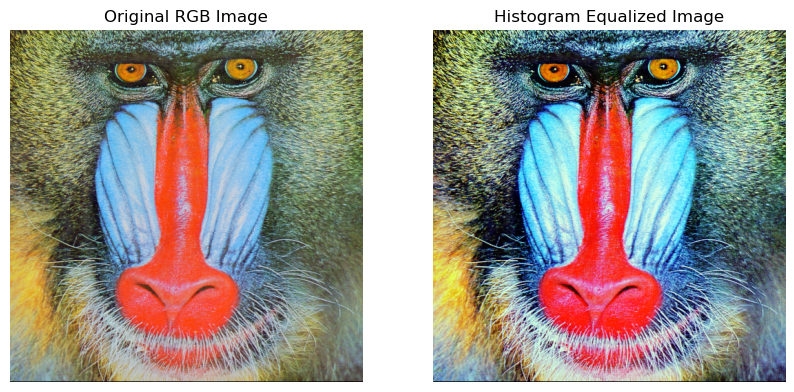

In [35]:

equalized_channels = []
for i in range(3):
    equalized = cv2.equalizeHist(image_rgb[:,:,i])
    equalized_channels.append(equalized)


image_equalized = cv2.merge(equalized_channels)


plot_image(image_rgb, image_equalized, "Original RGB Image", "Histogram Equalized Image")

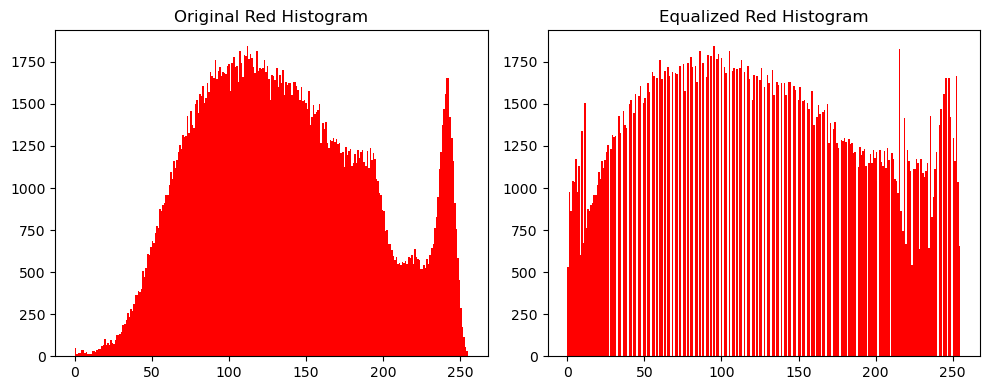

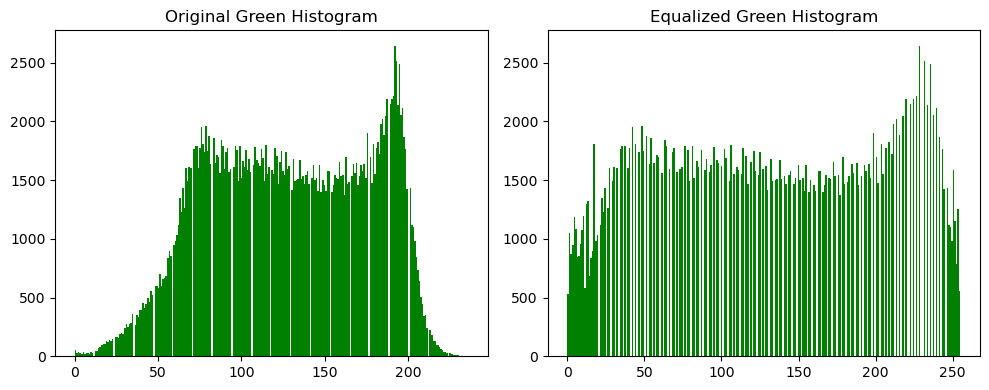

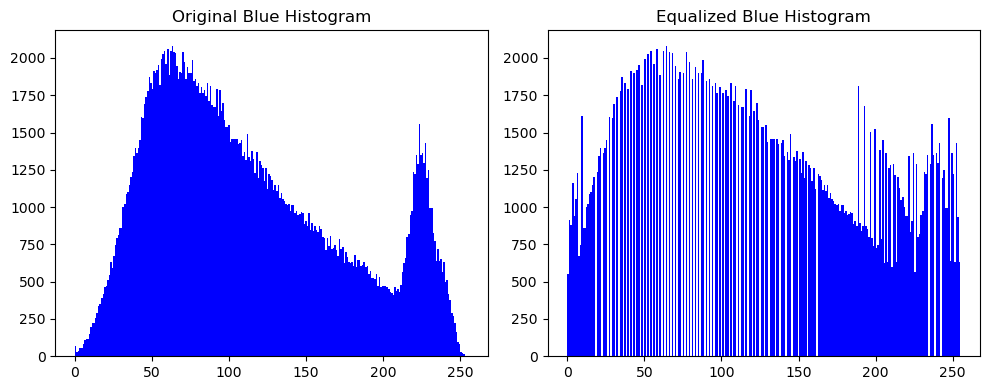

In [36]:
for i, color in enumerate(channels):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.hist(image_rgb[:,:,i].ravel(), bins=256, color=color.lower())
    plt.title(f'Original {color} Histogram')
    plt.subplot(1,2,2)
    plt.hist(equalized_channels[i].ravel(), bins=256, color=color.lower())
    plt.title(f'Equalized {color} Histogram')
    plt.tight_layout()
    plt.show()

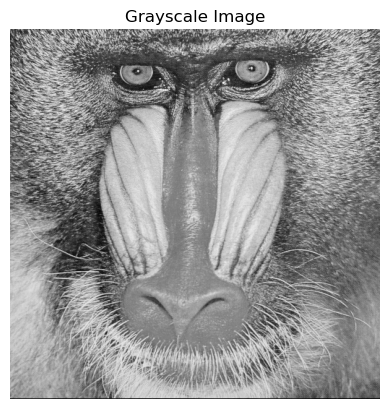

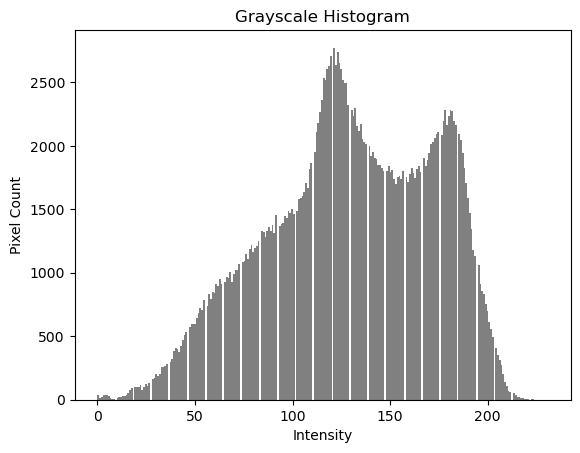

In [38]:

gray_image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)


plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()


plt.hist(gray_image.ravel(), bins=256, color='gray')
plt.title("Grayscale Histogram")
plt.xlabel("Intensity")
plt.ylabel("Pixel Count")
plt.show()

In [39]:
def thresholding(gray_image, threshold, max_value, min_value):
    N, M = gray_image.shape
    image_out = np.zeros((N, M), dtype=np.uint8)
    for i in range(N):
        for j in range(M):
            if gray_image[i, j] > threshold:
                image_out[i, j] = max_value
            else:
                image_out[i, j] = min_value
    return image_out

In [40]:
threshold = 1
max_value = 255
min_value = 0

threshold_image = thresholding(gray_image, threshold, max_value, min_value)
threshold_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)